In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
cd

/home/pr1407


In [12]:
cd "ED-Lab"


/home/pr1407/ED-Lab


In [13]:
cd "Caso 2"

/home/pr1407/ED-Lab/Caso 2


In [14]:
ls


'Caso 2.ipynb'   heart_disease_dataset.csv


In [15]:
dataframe = pd.read_csv('heart_disease_dataset.csv')

In [16]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [17]:
y = dataframe['num']
x = dataframe.drop('num', axis=1)

In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [19]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [21]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
145,47,1,3,108,243,0,0,152,0,0.0,1,0,3
84,52,1,2,120,325,0,0,172,0,0.2,1,0,3
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7
89,51,0,3,130,256,0,2,149,0,0.5,1,0,3
40,65,0,4,150,225,0,2,114,0,1.0,2,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,58,0,4,100,248,0,2,122,0,1.0,2,0,3
213,66,0,4,178,228,1,0,165,1,1.0,2,2,7
95,52,1,4,128,255,0,0,161,1,0.0,1,1,7
32,64,1,3,140,335,0,0,158,0,0.0,1,0,3


In [22]:
y_train


145    1
84     0
282    1
89     0
40     1
      ..
163    0
213    1
95     1
32     1
131    0
Name: num, Length: 212, dtype: int64

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
predicciones = knn.predict(x_test)

In [28]:
y_test

104    1
100    0
125    0
69     1
83     1
      ..
118    1
191    1
159    0
228    1
231    1
Name: num, Length: 91, dtype: int64

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicciones))
print(classification_report(y_test,predicciones))

[[34 18]
 [16 23]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        52
           1       0.56      0.59      0.57        39

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.63      0.63      0.63        91



In [30]:
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediccion_i = knn.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [31]:
tasa_error

[0.37362637362637363,
 0.3516483516483517,
 0.2967032967032967,
 0.3076923076923077,
 0.32967032967032966,
 0.32967032967032966,
 0.2857142857142857,
 0.2857142857142857,
 0.27472527472527475,
 0.26373626373626374,
 0.24175824175824176,
 0.25274725274725274,
 0.26373626373626374,
 0.24175824175824176,
 0.25274725274725274,
 0.26373626373626374,
 0.27472527472527475,
 0.25274725274725274,
 0.25274725274725274,
 0.2857142857142857,
 0.2857142857142857,
 0.25274725274725274,
 0.26373626373626374,
 0.24175824175824176,
 0.2857142857142857,
 0.2857142857142857,
 0.2967032967032967,
 0.2967032967032967,
 0.27472527472527475]

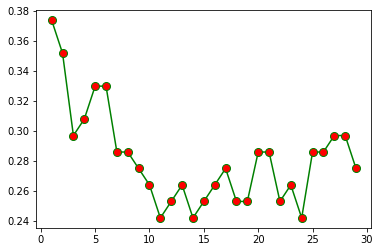

In [32]:
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o',markerfacecolor = 'red', markersize='8')

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predicciones = knn.predict(x_test)
print(confusion_matrix(y_test, predicciones))

[[39 13]
 [14 25]]


In [34]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74        52
           1       0.66      0.64      0.65        39

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91

